# Height as a factor in domestic (US) movie success

## Names
- Phillip Carver
- Aiden Jauffret-Opilka
- Sonia Kalwit
- Kareema Kilani

## Overview
In this analysis, we took the top 500 grossing movies in the United States and analyzed whether or not their domestic success had any relation to the average height of the leading cast. Although there was no distinct linear relationship between the two variables, we do see that these actors’ heights are not representative of the average American population. With the help of different visualizations, we were able to dive deeper into the potential subtle implications of our results, which may not have directly addressed our hypothesis, but provided a unique perspective to our initial question.

## Research Question
Does the average height of the leading cast in live action movies have a positive relationship with the sales and popularity of such movies? 
- Do specific distributing companies hold a large impact among the domestic gross in relation to height of lead actors? 
- Are lead actors representative of the American general population in terms of height? 

## Background and Prior Work
The topic of our research project is the presence of heightism in the film industry and its potential as a factor in the domestic popularity of American movies. Heightism is defined as the “prejudice or discrimination against short people” (Merriam-Webster). Our goal is not to paint the American film industry as heightist, but to uncover whether or not American audiences or film production companies have an inherent bias in favor of tall actors. If our research supports that tall actors are favored and that lead actor height as a factor in movie success is on par with other factors such as genre, then it might be worth diving deeper into the prevalence of heightism in other industries. That is not to say that a null hypothesis would make the study of heightism elsewhere unfounded, just that a rejection of the null would provide more support for such research. Overall, we believe that such a study might expose the presence of underlying issues that are not typically discussed and set a precedent for new and more in depth studies on the topic.

Our research focuses on domestic movies and domestic audiences here in the United States, since cultures across the globe may have different perceptions of height. It also helps refine our data to make more specific interpretations based on our results. 

It is commonly known that heightism has been highly associated within success in America. In some professional fields, specific height is necessary to be successful - for example, sports - where being tall is a determining factor of winning a game. On the other hand, when we look at professions that do not carry intrinsic value of height, we see a correlation of height as a common factor in someone’s success (“Standing Tall Pays off, Study Finds”). When taking a look at the presidential election, it is historically proven that in the majority of cases, the taller candidate has won the popular vote (par. 12). Here we aim to study the question...is this pure coincidence or does height play a larger part in how Americans view people in the spotlight?

Rosenberg critically looks at heightism in relations to prejudice and discrimination against a person on the basis of his or her height (910). Although height is a nontraditional form of discrimination, it still seems to be a large indicator of gender when hiring (Rosenberg 911). For example, Rosenberg explains that height could play a role when deciding whether to hire a short man or a tall woman, feeding into gender stereotypes. If this were the case, it is technically prohibited by Title VII of the Civil Rights Act of 1964, stating that employers cannot discriminate against applicants or employees because of their race, religion, national origin, color, or sex. (Rosenberg 915). However, this becomes more difficult to dissect if humans just have a natural cognitive bias to human features like height. 

A cognitive phenomena that we are taking into consideration in this study is the “cheerleader effect”. This is a perceptual phenomenon where faces among a group of people are perceived to be more attractive/appealing to the human eye rather than individually (May par. 3). Walker and Vul explains how the “average size of group members, their average location, and even the average emotional expression on faces'' contributes to three of a human’s visio-cognitive processes (par. 5). Walker and Vul conducted an experiment to find if the same faces would be more attractive among a group or individually. Participants rated the attractiveness of each face twice, once in a group photo and once in an individual portrait. Their findings contributed to the cheerleader effect since male and female were found more attractive in group setting rather than the individual portrait (May par. 9). Based on this phenomenon, we are averaging out the lead actors’ heights for the movies that have more than one lead star. 

### References
- “Heightism.” Merriam-Webster, Merriam-Webster, www.merriam-webster.com/dictionary/heightism.
- “How Much Does Height Matter In Career Success”, 2015, [online], Linkedin, 7th, Jan, www.linkedin.com/pulse/how-much-does-height-matter-career-success-shane-snow/.
- Landsburg, Steven E. “It Pays to Be Tall.” Slate Magazine, Slate, 25 Mar. 2002, slate.com/culture/2002/03/it-pays-to-be-tall.html. 
- Rosenberg, Isaac B. “Height Discrimination in Employment.” Utah Law Review, vol. 2009, no. 3, Aug. 2009, pp. 907–953. EBSCOhost, 
- “Standing Tall Pays off, Study Finds.” Monitor on Psychology, American Psychological Association, www.apa.org/monitor/julaug04/standing.

## Hypothesis
The success of a movie is positively correlated with the average height of its leading cast. We anticipate a bimodal distribution of height with respect to average height vs. success. 

## Datasets

### The Numbers
- Source: https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time, first 5 pages
- Observations: 500 (100 per page)
- This website provides detailed movie financial analysis and cast information. The link contains a table of the top movies based on the cumulative domestic box office, and we scraped the top 500 to create our dataset. Moreover, each entry contained a link to a movie page, where we scraped for a list of lead actors for each observation.

### IMDB 
- Source: www.imdb.com
- From the leading cast info provided by 'The Numbers', we scraped for height on their respective IMDB pages and produced an average for each movie.

### Wikipedia
- Source: https://en.wikipedia.org/wiki/{actor_name}
- Used to find heights not provided on IMDB.

## Setup

In [1]:
# Data, plotting
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Scraping
import html5lib
import requests
import bs4
from bs4 import BeautifulSoup

## Data Cleaning

Throughout this project, our data collection was largely reliant on webscraping via Beautiful Soup. Defined below are the functions we used to scrape from our two datasets/sources.

In [2]:
# Create dataframe for each page, dropping irrelevant columns and formatting 
def create_df(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    #get table
    df = pd.read_html(page.content)[0]
    
    #cleaning
    df = df.drop(columns=['InternationalBox Office','WorldwideBox Office'])
    df.columns = df.columns.str.lower()
    df = df.rename(columns={'domesticbox office':'domestic_gross'})
    df['domestic_gross'] = df['domestic_gross'].apply(lambda x: float(x.replace('$','').replace(',','')))
    
    #get link for each movie to use for scraping functions
    b_tags = soup.find('table').find_all('b')
    links = list()
    site = 'https://www.the-numbers.com'
    for b in b_tags:
        a_tag = b.find('a')
        links.append(site + a_tag.get('href').replace('#tab=summary',''))
        
    df['link'] = pd.Series(links)
    
    return df


# Scrape lead actors from each movie page on 'The Numbers' as a list
def get_movie_leads(title_url):
    
    title_url += '#tab=cast-and-crew'
    page = requests.get(title_url)
    soup = BeautifulSoup(page.content,'html.parser')
    
    lead_cast_div = soup.find("div", {"class": "cast_new"})
    lead_tags = lead_cast_div.find_all("span", itemprop="name")
    
    leads = list()
    for name in lead_tags:
        leads.append(name.text)
    
    return leads


# Average heights for leading cast
def get_avg_height(leads):
    
    total = 0
    for actor in leads:
        actor = actor.replace(',','').replace('Ã©','e').replace('Ã¥','a').replace('*','')
        actor = actor.lower()
        
        # Actor changed name
        if 'ellen page' in actor:
            actor = 'elliot page'

        imdb_search = requests.get('http://imdb.com/find?q=' + actor)
        soup = BeautifulSoup(imdb_search.text, 'html.parser')

        #get first search result on IMDB
        result = soup.find_all('td', class_='result_text')[0]
        actor_id = result.find_all('a')[0]['href']

        actor_page = requests.get('http://imdb.com/' + actor_id)
        soup = BeautifulSoup(actor_page.text, 'html.parser')
    
        try:
            height = soup.find('div', id='details-height').text
            height_m = float(height[ height.find('(') + 1 : height.find('m') - 1 ])
            total += height_m
        except:
            # catch exception, print actor if height not found on IMDB page
            print('Actor:' + actor)
        
    return total/len(leads)

In [3]:
# data collection
records_1 = 'https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time'
records_2 = 'https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time/101'
records_3 = 'https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time/201'
records_4 = 'https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time/301'
records_5 = 'https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time/401'

df1 = create_df(records_1)
df2 = create_df(records_2)
df3 = create_df(records_3)
df4 = create_df(records_4)
df5 = create_df(records_5)

df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df

,rank,year,movie,distributor,domestic_gross,link
0,1,2015,Star Wars Ep. VII: The Force Awakens,Walt Disney,936662225.0,https://www.the-numbers.com/movie/Star-Wars-Ep...
1,2,2019,Avengers: Endgame,Walt Disney,858373000.0,https://www.the-numbers.com/movie/Avengers-End...
2,3,2009,Avatar,20th Cent…,760507625.0,https://www.the-numbers.com/movie/Avatar
3,4,2018,Black Panther,Walt Disney,700059566.0,https://www.the-numbers.com/movie/Black-Panther
4,5,2018,Avengers: Infinity War,Walt Disney,678815482.0,https://www.the-numbers.com/movie/Avengers-Inf...
...,...,...,...,...,...,...
495,496,2010,Shutter Island,Paramount…,128012934.0,https://www.the-numbers.com/movie/Shutter-Island
496,497,2014,Into the Woods,Walt Disney,128002372.0,https://www.the-numbers.com/movie/Into-the-Woods
497,498,1985,Rocky IV,MGM,127873716.0,https://www.the-numbers.com/movie/Rocky-IV
498,499,2007,Enchanted,Walt Disney,127706877.0,https://www.the-numbers.com/movie/Enchanted


Animated movies do not contribute to our analysis as the physical appearance of the actors is not available to the audience. Unfortunately, we struggled with finding a way to remove these movies programatically from our dataset. As a result, we filtered  them by hand which removed 94 observations from our dataset.

In [4]:
#drop animated movies
animated_i = [10,11,16,17,22,24,28,30,39,43,48,49,50,52,53,58,61,72,93,101,109,110,111,112,113,116,121,127,132,133,135,142,144,165,166,177,179,182,184,186,193,200,202,212,21,219,220,222,223,225,227,229,230,232,234,235,239,243,250,260,261,271,276,279,282,297,302,311,318,325,328,333,334,337,343,356,358,361,365,366,378,383,384,393,394,406,407,410,413,416,450,475,483,499]

#rank to index
animated_i = [x - 1 for x in animated_i]
df = df.drop(animated_i).reset_index(drop=True)
df.shape

(406, 6)

After scraping for the lead actors for each movie, we found that numerous observations produced an empty array. Looking at the movie page (on 'The Numbers') for each of these observations, it seems that these movies listed all their actors under 'Supporting Cast'. We removed these observations as the supporting cast tended to include the entire cast, including extras and minor characters. This removed another 94 observations from our dataset.

In [ ]:
# THESE CELLS TAKE A SIGNIFICANT AMOUNT OF TIME TO RUN (45-60 min total)

# get list of lead actors for each movie
df['leads'] = df['link'].apply(get_movie_leads)

# find and drop rows with no leads listed
df = df.drop(df.loc[df['leads'].str.len() == 0].index).reset_index(drop=True)

# get average height of leading cast for each movie
df['avg_height'] = df['leads'].apply(get_avg_height)

Given the long processing times for our scraping functions, we partitioned our dataset into 3 slices and ran these functions in parallel on our member's computers.

In [5]:
df1 = pd.read_csv('slice_1') #df[0:135]
df2 = pd.read_csv('slice_2') #df[135:270]
df3 = pd.read_csv('slice_3') #df[270:406]

df = pd.concat([df1,df2,df3]).reset_index(drop=True)

There were a few top-billed actors without their heights listed on IMDB, and actor entry typos on 'The Numbers' (printed above). There were 11 errors in total, which skewed the average for those movies. We fixed these averages by finding their heights on IMDB (or Wikipedia if unavailable).

In [6]:
# cleaning: update actor name entry errors from 'The Numbers', fix height avgs, remove entries with missing height info on IMDB
df.loc[df['rank'] == 129, 'avg_height'] = 1.72
df.loc[df['rank'] == 163, 'avg_height'] = 1.7775
df.loc[df['rank'] == 170, 'avg_height'] = 1.6733
df.loc[df['rank'] == 176, 'avg_height'] = 1.7
df.loc[df['rank'] == 195, 'avg_height'] = 1.759
df.loc[df['rank'] == 199, 'avg_height'] = 1.73
df.loc[df['rank'] == 244, 'avg_height'] = 1.6357
df.loc[df['rank'] == 375, 'avg_height'] = 1.777
df.loc[df['rank'] == 377, 'avg_height'] = 1.7366
df.loc[df['rank'] == 418, 'avg_height'] = 1.7666

# drop indices with only child actors as leads
df = df.drop([301])
df = df.reset_index(drop=True)

## Exploratory Data Analysis & Visualization

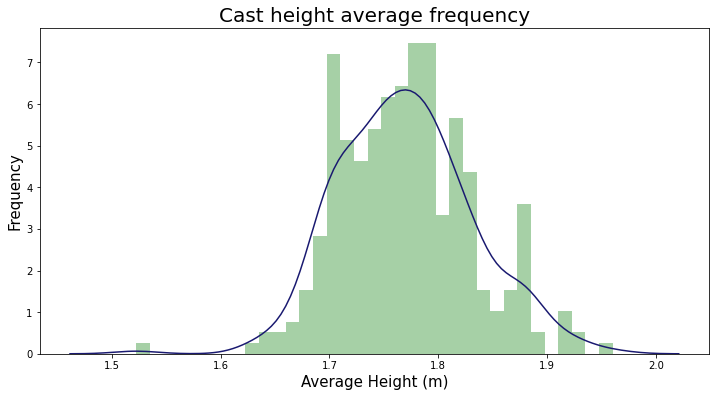

In [7]:
plt.figure(figsize=(12,6))
ax = sns.distplot(df['avg_height'], bins=35, color='forestgreen',kde_kws={'color':'midnightblue'})
plt.title('Cast height average frequency', size=20)
plt.xlabel(xlabel='Average Height (m)', size=15)
plt.ylabel(ylabel='Frequency', size=15)
plt.show()

In [8]:
df['avg_height'].describe()

count    311.000000
mean       1.769719
std        0.061201
min        1.522500
25%        1.726333
50%        1.766667
75%        1.807500
max        1.960000
Name: avg_height, dtype: float64

This first visualization is a histogram featuring average height and frequency on the x and y axes, respectively. The results of our analysis in this histogram reveal a relatively normal distribution between the 2 variables. While the presence of such a distribution seems to indicate a lack of significant correlation, the fact that it is normally distributed might actually have other implications. The average male height in the United States is 5’9” and the average female height is 5’4”. The mean of plotted data was 1.79716, which when converted to the American height system is roughly 5’10”. While there is no positive trend between height and movie gross domestic profit, the distribution does not reflect average American height trends. 

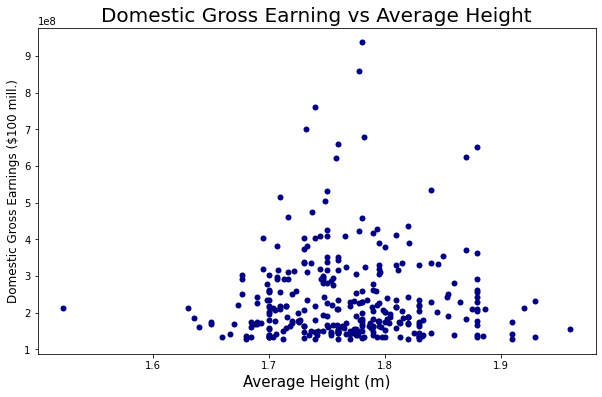

In [9]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='avg_height',y='domestic_gross',data=df,linewidth=0,color='navy')
plt.title('Domestic Gross Earning vs Average Height', size=20)
plt.xlabel(xlabel='Average Height (m)', size=15)
plt.ylabel(ylabel='Domestic Gross Earnings ($100 mill.)', size=12)
plt.show()

In [10]:
df.corr().loc['domestic_gross','avg_height']

0.005301217031764228

This second visualization is a scatter plot that features average height and domestic gross profit on the x and y axes, respectively. Since our correlation coefficient 0.005 is so close to 0, it is safe to say that there is no linear correlation between height and the success of a movie. Most of the data points seem to be dense and centralized in the visualization. There are a handful of outliers on both ends of the average height but it may have to do with a specific film and character choice. 

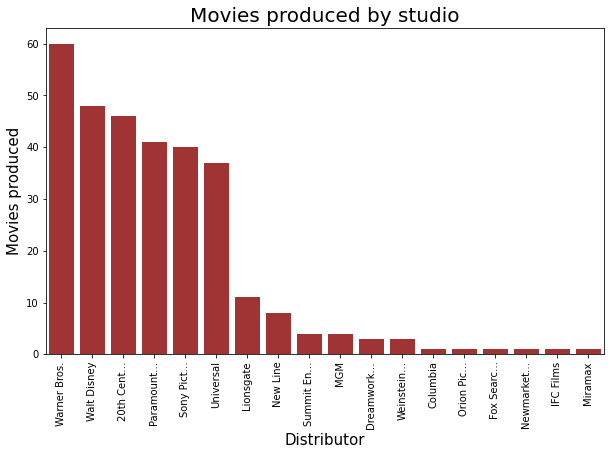

In [11]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='distributor', data=df, order=df['distributor'].value_counts().index, color='firebrick')
plt.title('Movies produced by studio', size=20)
plt.xlabel(xlabel='Distributor', size=15)
plt.ylabel(ylabel='Movies produced', size=15)
plt.xticks(rotation=90)
plt.show()

From this plot, we see that six studios produced a majority of the films in our dataset. Let's take a closer look at the (Pearson) correlation coefficient of average height v. domestic gross for trends within these individual studios. It seems that from our dataset, Universal Studios showed the highest positive correlation between average height and domestic gross, while 20th Century Fox showed the highest negative correlation.

In [12]:
# print correlation coefficient of domestic gross v. average height for the top 6 studios
for studio in df['distributor'].value_counts().index.tolist()[:7]:
    print(studio + '\t' + str(df.loc[df['distributor'] == studio].corr().loc['domestic_gross','avg_height']))

Warner Bros.	-0.16252134707084806
Walt Disney	0.0350242837592084
20th Cent…	-0.2293415046019639
Paramount…	-0.011624680521901206
Sony Pict…	-0.05868146777121124
Universal	0.41273418754638497
Lionsgate	-0.16734689182237686


## Data Analysis

Assuming men and women each made up half of the actor/actress population in America, the mean height of our data would likely be somewhere in between 5’4” and 5’9”. The fact that this is not the case potentially indicates that the industry is dominated by men or that studios may tend to prefer hiring taller actors and actresses. Another thing to note is that only about 14.5% of American are 6 feet or taller and only about 1% of American women are 6 feet or taller, yet our data does not represent such a population. 

One thing that the second visualization does well is emphasize outliers, such as the sole point below the 1.6 meter mark. The lead actor average for this movie (Austin Powers in Goldmember) was especially low due to the actor Verne Troyer who is 2’8” and played the role of “Mini Me”, which assuredly skewed the average for this movie. This potentially indicates that the stories produced by top studios typically do not feature shorter individuals or those with dwarfism. On the other hand, the film with the highest average height featured Dwayne "The Rock" Johnson as the lone lead, who is listed at 6'5

Although our study doesn’t represent a construct validity in the film industry, we did notice distinct trends for the top 6 studios within our dataset. Perhaps this is a result of the hiring patterns/preferences for these particular studios, but this does not seem generalizable across the film industry. We can make the inference that average height among lead actors is not a determining factor of success in terms of the top 500 domestic box office gross earnings.

## Privacy/Ethics Considerations
In this project, we used datasets from “The Numbers" and IMDB. Since both these sites allow for web scraping - we see no possible ethical violations here. The data we are studying is also publicly available and part of a performer’s public profile. 

One ethical consideration that may be out of our control but something we are aware of is that there’s a chance that these websites may not be publishing accurate information. As of now, we are not aware of IMDB or The Numbers falsely reporting any numbers, names, or other information. We have to work on good faith that this data is credible. 

Our objective is to highlight possible biases and not to encourage them. A concern we discussed was our research unintentionally encouraging discriminatory hiring practices in the film industry if we were to find a strong positive correlation between height and financial success. Consequences may include more widespread heightist practices that would further disadvantage shorter actors and promote the current “Hollywood” standard of beauty or success. Studios may “double-down” on recruiting tall actors to turn a profit.

## Conclusion & Discussion
From our data, we can conclude that there is no linear relationship between the success of these movies and the height of their lead actors. However, we were surprised to see that the majority of the actors were above the average height of the people in the United States.

Some limitations that we encountered in our analysis were around data collection and data interpretation. We believed that working with a dataset of the top 500 films would be adequate, however, after filtering out animated movies, films with child actors, and faulty data points, our datasets shrank quite a bit. These variables caused us to filter out a significant portion of our initial dataset. Due to web scraping limitations and inconsistency, the initial dataset itself was restricted. If it were not for the amount of time it took to process it all in each Jupyter cell (it took 45-60 minutes to scrape for actors and heights), we would have highly considered doubling or tripling the sample size of our analysis. Given the collective webscraping expertise of our team, our approach was very ambitious and we did not experience the ease of data collection that we anticipated. Despite the issues we faced, this project was an infinitely valuable learning experience.

It's important to consider future research about this topic that can focus on restricting the confounding variables due the myriad of other variables contributing to lead actors' average height such as gender, race, and other factors that come into play when it comes to each individual actor. Future research can focus on random samples of all movies to show representation of the film industry. Filtering the movies to focus on specific genres or years can inflict various results among actors' height due to the inherent elements of genres' audience.  

In terms of the data itself, the more we explored our data, we noticed that investigating trends in a creative field where characters can take on any form with technological help, differing storylines, and a varied cast can be difficult to interpret. It would be interesting to separate this data by genre, by time period, by gender, and even by the top producers and distributors. There is a lot of nuance in the film and every other industry. In order to be more conclusive, future studies should dive deeper into the aforementioned factors in movie success.
